# Loan Application Status Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:
Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

Dependent Variable (Target Variable):

Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [2]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Loan Predication CSV dataset file using pandas
df=pd.read_csv('loan_prediction.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
#last 5 records
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
#columns list
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
#information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are three types of datatype dtypes: float64(4), int64(1), object(8).

 we have 614 rows with 13 columns including target variable.
A Target Variable is 'Loan_Status' having object datatype and It is categorical variable.

In [9]:
#checking missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [12]:
# Imputating Missing value with mode for categorical features

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

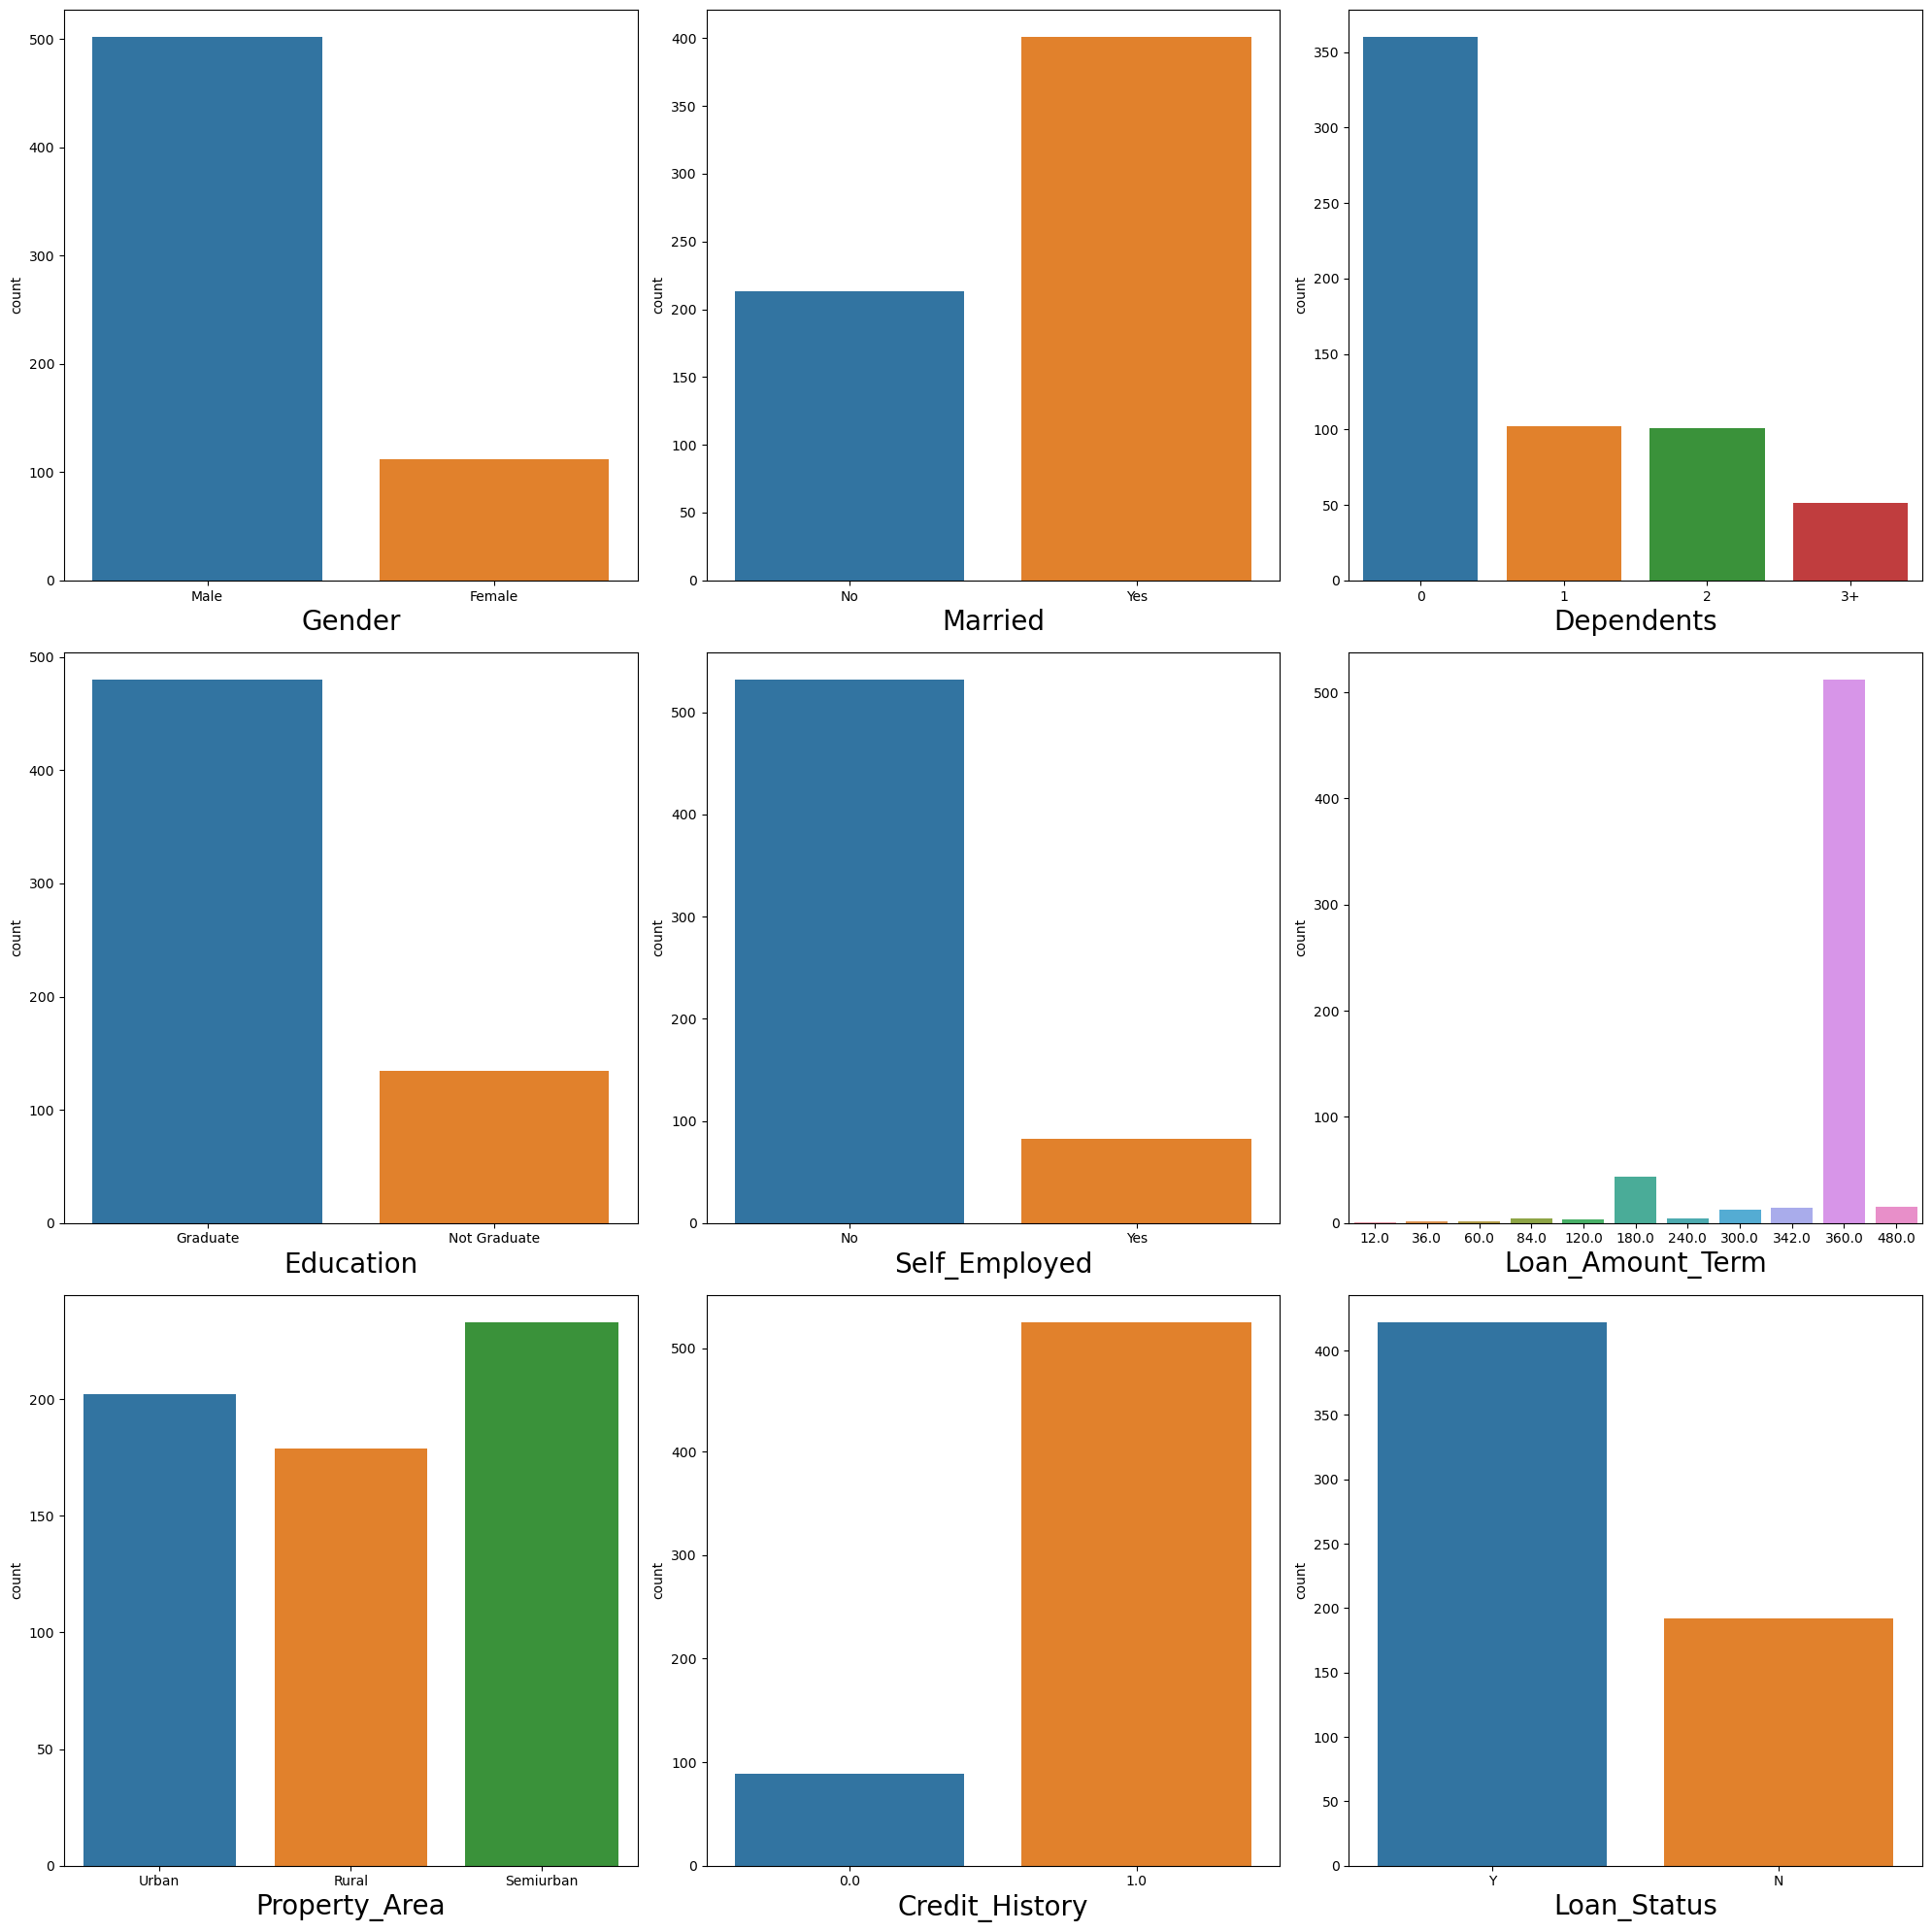

In [13]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

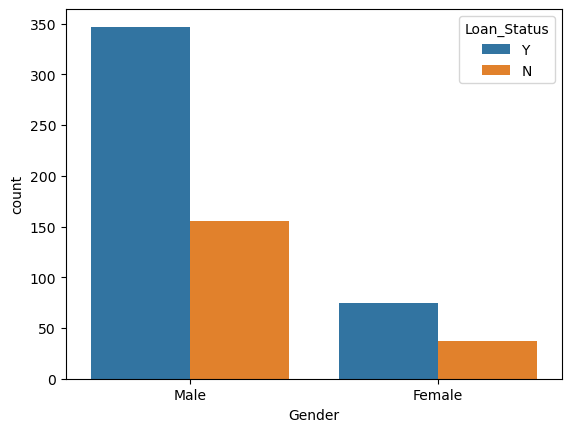

In [15]:
sns.countplot('Gender',hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

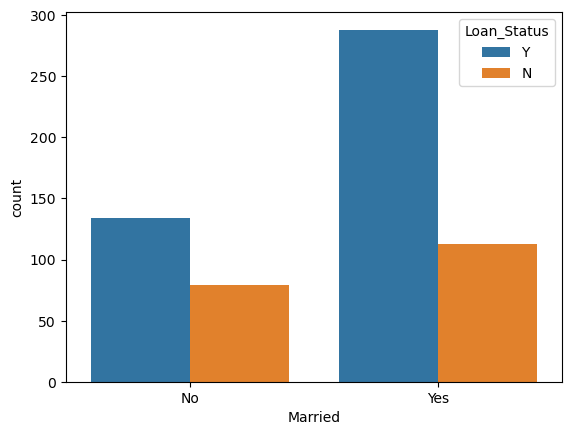

In [16]:
sns.countplot('Married',hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

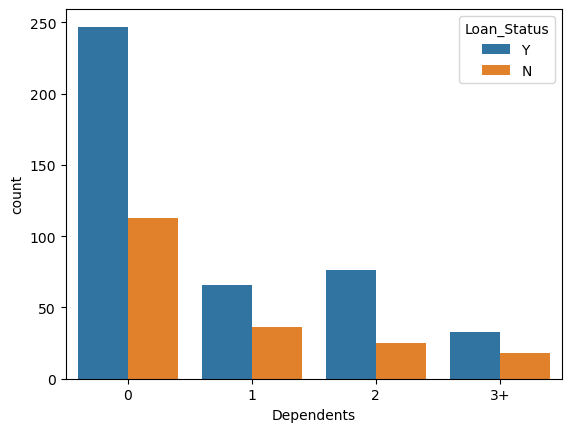

In [17]:
sns.countplot('Dependents',hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

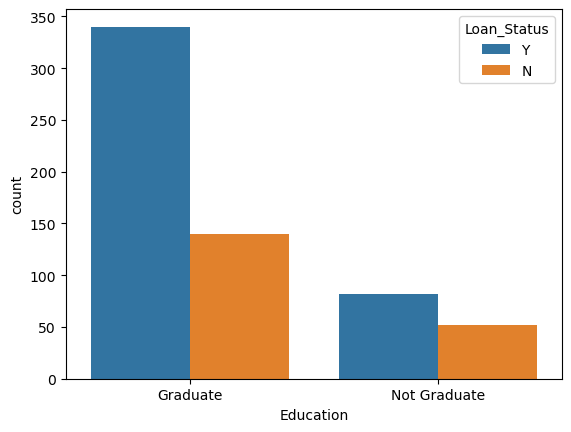

In [18]:
sns.countplot('Education',hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

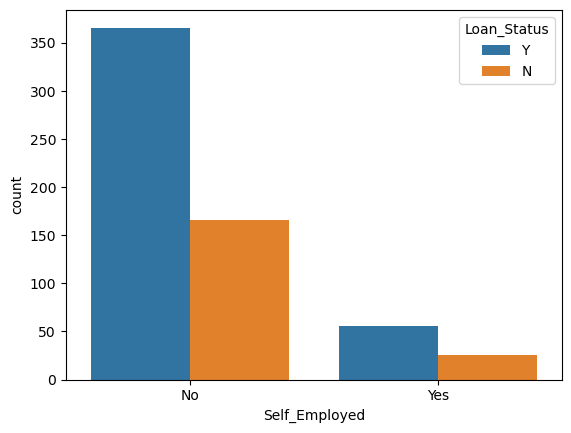

In [19]:
sns.countplot('Self_Employed',hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

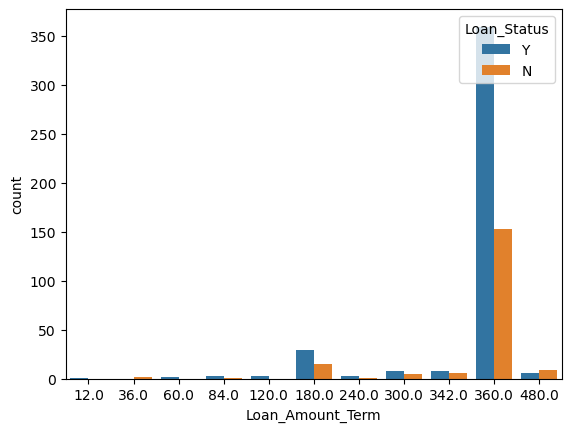

In [20]:
sns.countplot('Loan_Amount_Term',hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

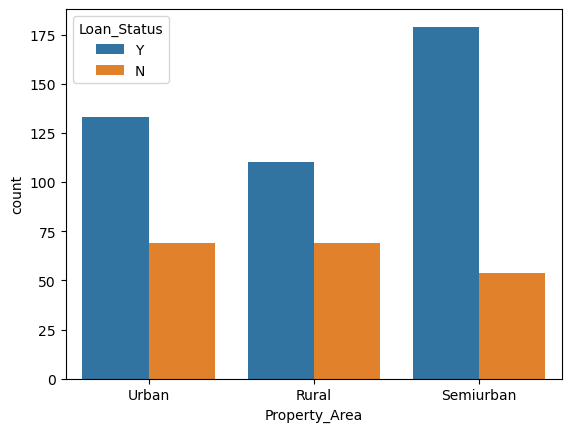

In [21]:
sns.countplot('Property_Area',hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

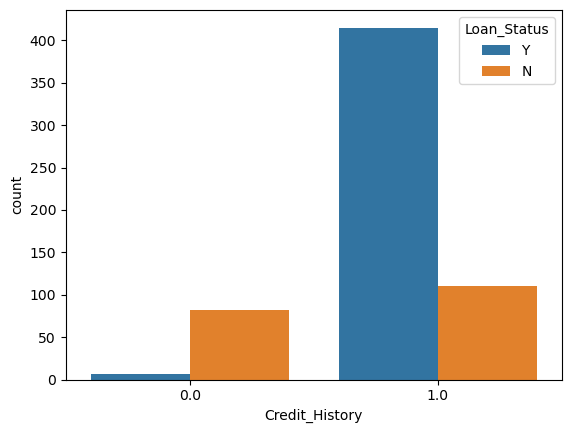

In [22]:
sns.countplot('Credit_History',hue="Loan_Status",data=df)

 From the above plots we can see that,
 Out of Total loan application 80 % applicants are Male
 
 Almost 60% of the applicants have no dependents.
 
80% people previously have credit history. 

only 20% applicants are self employed

In [23]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [24]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

<Figure size 1200x800 with 0 Axes>

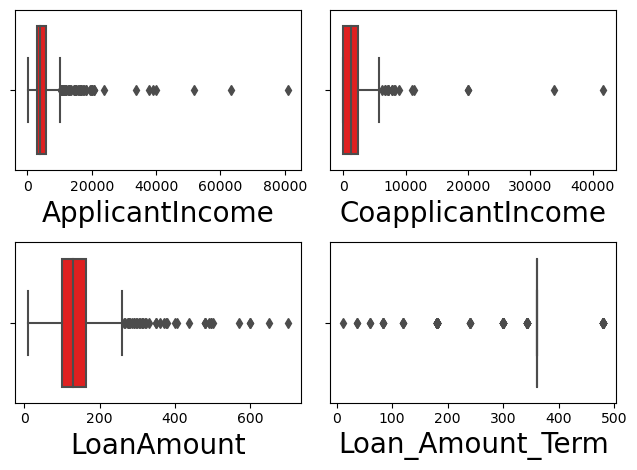

In [25]:
for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


In [26]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)

In [27]:
# we convert yes to 1 and No to 0
df['Dependents'] = df['Dependents'].replace({'0': 0, '1': 1,'2':2,'3+':3}).astype(int)

#    Outliers Removal using ZSCORE Method

In [28]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [29]:
print ("Percentage of data loss", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Percentage of data loss 6.026058631921824


In [30]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [31]:
df['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int32

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [33]:
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [35]:
X_scale = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (429, 11)
Training target vector size: (429,)
Test feature matrix size: (185, 11)
Test target vector size: (185,)


In [36]:
#Decision Tree Classifier
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('Accuracy score using Decision Tree classifier',accuracy_score(Y_test, y_pred))

Accuracy score using Decision Tree classifier 0.7081081081081081


In [37]:
print(confusion_matrix(Y_test, y_pred))

[[ 29  32]
 [ 22 102]]


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)

In [39]:
print('Accuracy score', accuracy_score(Y_test, y_pred))
print('confusion matrix',confusion_matrix(Y_test, y_pred))

Accuracy score 0.7783783783783784
confusion matrix [[ 31  30]
 [ 11 113]]


In [40]:
#Crossvalidation
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier()]
    

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('Cross Validation using ',m)
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation using  LogisticRegression()
Score : [0.81300813 0.77235772 0.7804878  0.84552846 0.81147541]
Mean Score : 0.8045715047314408
Std deviation : 0.02613068941485059




Cross Validation using  DecisionTreeClassifier()
Score : [0.67479675 0.62601626 0.71544715 0.76422764 0.72131148]
Mean Score : 0.7003598560575769
Std deviation : 0.04674640903691248




Cross Validation using  RandomForestClassifier()
Score : [0.7804878  0.75609756 0.7804878  0.82113821 0.81147541]
Mean Score : 0.7899373583899775
Std deviation : 0.023499365522185053




# Hyper Parameter Tuning : GridSearchCV

In [41]:

from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.791 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.837 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.721 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.686 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.741 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.791 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.872 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, ma

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [42]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 70}

In [43]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score', accuracy_score(Y_test, y_pred))

Accuracy Score 0.772972972972973
